# Binary Classification with a Bank Churn 

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Sumit Sharma</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Sumit444-commits) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mepinnacle) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sumit-sharma-a0b2c7/)  

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/profile.php?id=61563105540020) 
[![portfolio](https://img.shields.io/badge/Portfolio-Profile-blue?style=for-the-badge&logo=portfolio)](https://sumit-portfolio.free.nf/) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:sumit8444061@gmailcom)


In this notebook, I will be using a dataset from a bank to predict whether a customer will leave the bank or not. This is a binary classification problem.

The dataset is from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

The dataset contains the following columns:

- `id`: A unique identifier for each row in the dataset.  
- `CustomerId`: A unique identifier assigned to each customer.  
- `Surname`: The last name of the customer.  
- `CreditScore`: The credit score of the customer (higher scores indicate better creditworthiness).  
- `Geography`: The country or region where the customer resides.  
- `Gender`: The gender of the customer (Male/Female).  
- `Age`: The age of the customer in years.  
- `Tenure`: The number of years the customer has been with the bank.  
- `Balance`: The account balance of the customer.  
- `NumOfProducts`: The number of financial products the customer has with the bank.  
- `HasCrCard`: Indicates if the customer has a credit card (1: Yes, 0: No).  
- `IsActiveMember`: Indicates if the customer is an active member (1: Yes, 0: No).  
- `EstimatedSalary`: The estimated annual salary of the customer.  
- `Exited`: Whether the customer has left the bank (1: Yes, 0: No).  

### Aim:
The goal is to predict whether a customer will leave the bank or not.

The dataset is available in a .csv file and can be downloaded from Kaggle.


### Libraries Used
- **Pandas**: For data manipulation and analysis.
- **Numpy**: For numerical operations.
- **Matplotlib**: For data visualization.
- **Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning modeling and evaluation.



In [1]:
# import libraries
# for data manipulation and numerical operations
import numpy as np
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# import ml model
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# for preprocessing
from sklearn.preprocessing import LabelEncoder

# for splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

Files
* `train.csv` - the training dataset; Exited is the binary target
* `test.csv`- the test dataset; your objective is to predict the probability of Exited
* `sample_submission.csv` - a sample submission file in the correct format

In [2]:
# load the data
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
submission = pd.read_csv('./Data/sample_submission.csv')

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


### Let's explore the train.csv file data

In [6]:
# df_train = df_train.copy()

In [7]:
# Printing the shape of the data
print(f"Total number of rows in the train data: {df_train.shape[0]}, Total number of columns in the train data: {df_train.shape[1]}")


Total number of rows in the train data: 165034, Total number of columns in the train data: 14


In [8]:
# information about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


id             0
CustomerId     0
Surname        0
CreditScore    0
Geography      0
dtype: int64


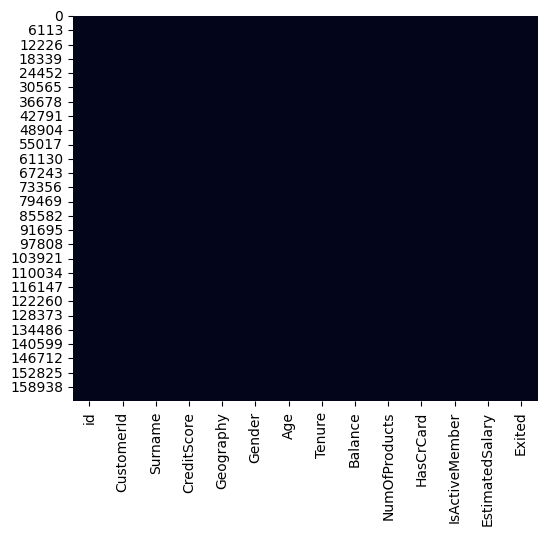

In [9]:
# Printing the missing values
print((df_train.isnull().sum()).sort_values(ascending=False).head())

# lets plot the null values
plt.figure(figsize=(6, 5))
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [10]:
# Summary of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


There are some columns in the dataset which are categorical in nature, but their data type is not object.

* `Geography`, `Gender` (Already in object data type)
* `HasCrCard`, `NumOfProducts`, `IsActiveMember`, `Exited` (these columns shows categorical nature)

In [11]:
numerical_columns = ['CreditScore','Age','Balance', 'EstimatedSalary'] # numerical columns

categorical_columns = ['Geography', 'Gender','Tenure', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Exited'] # categorical columns

other_cols = ['id', 'CustomerId', 'Surname'] # other columns

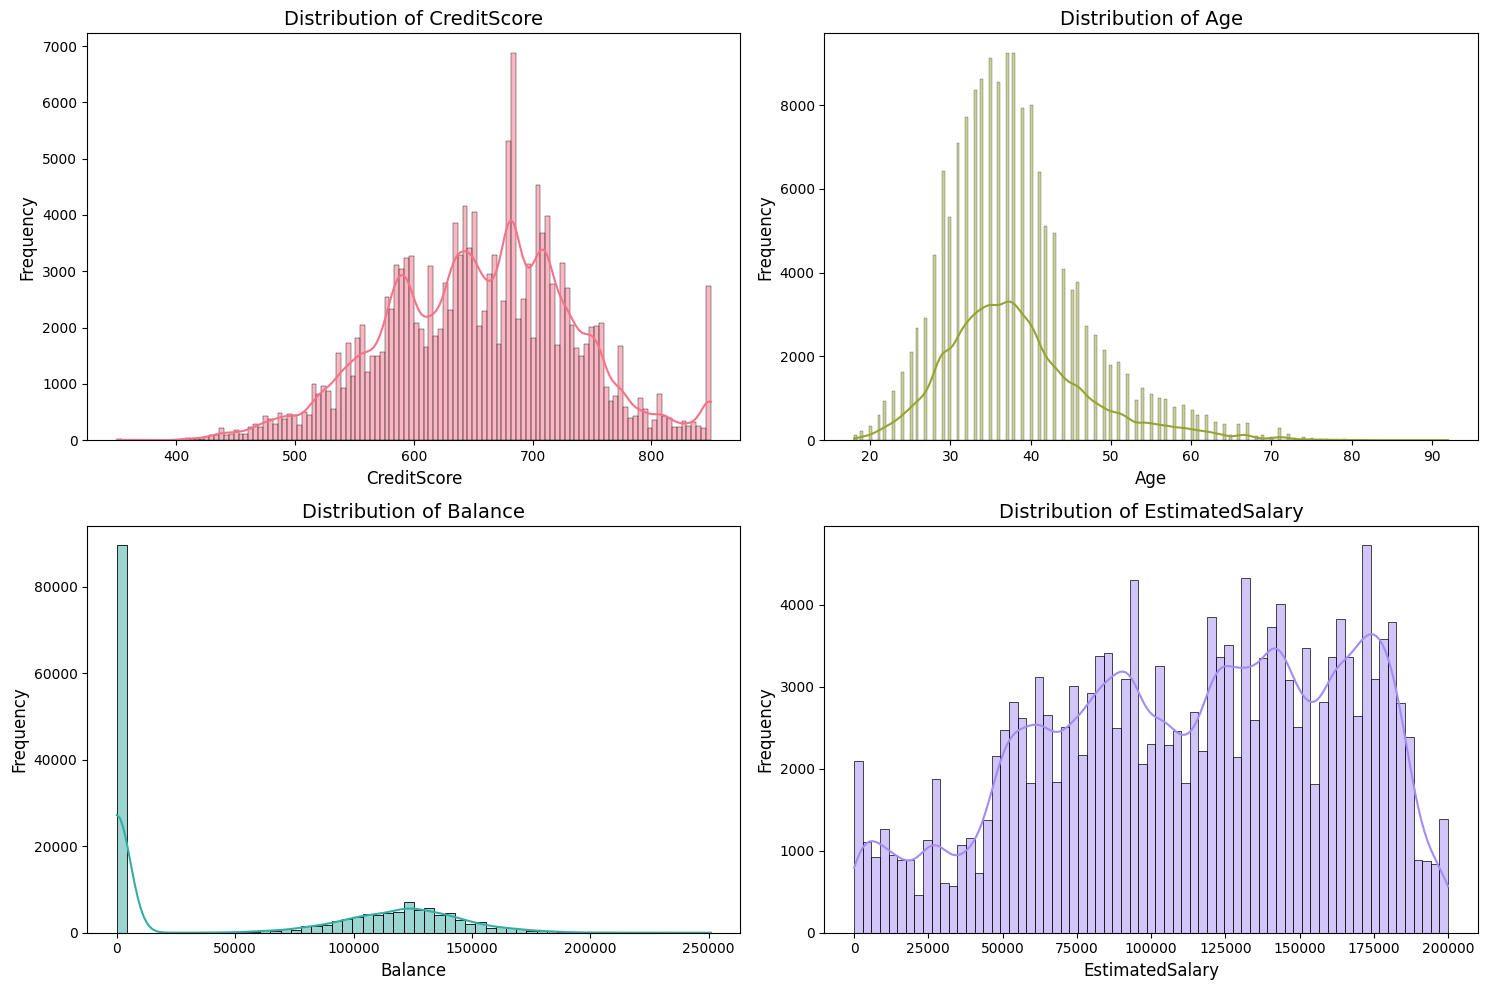

In [12]:
# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
rows = (num_cols + 2) // 3  # Ceiling division for 2x3 layout

# Set up subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))
colors = sns.color_palette('husl', num_cols)  # Generate unique colors

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df_train[column], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

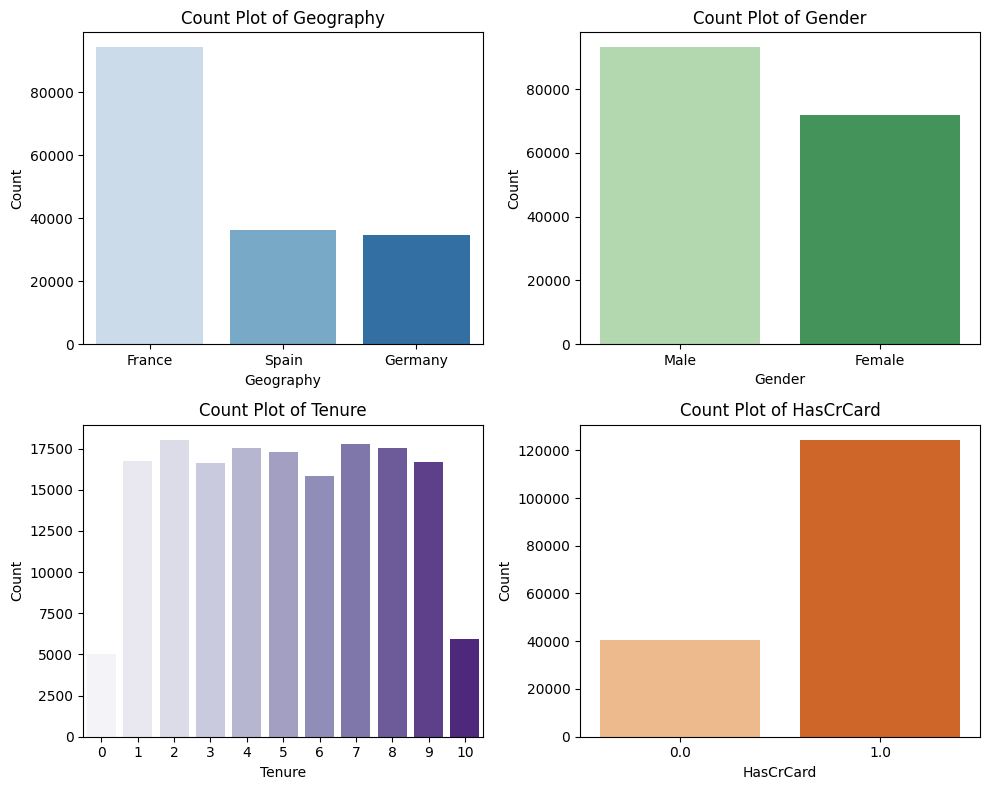

In [13]:
# subplots of the categorical columns using for loop
# Set up subplots (2x2 grid)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Define a list of color palettes
color_palettes = ['Blues', 'Greens', 'Purples', 'Oranges']

# Loop through categorical columns and plot
for ax, column, palette in zip(axes, categorical_columns, color_palettes):
    sns.countplot(data=df_train, x=column, ax=ax, palette=palette)
    ax.set_title(f"Count Plot of {column}")
    ax.set_ylabel("Count")
    ax.set_xlabel(column)

# Remove any unused subplot axes (if less than 4 columns)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

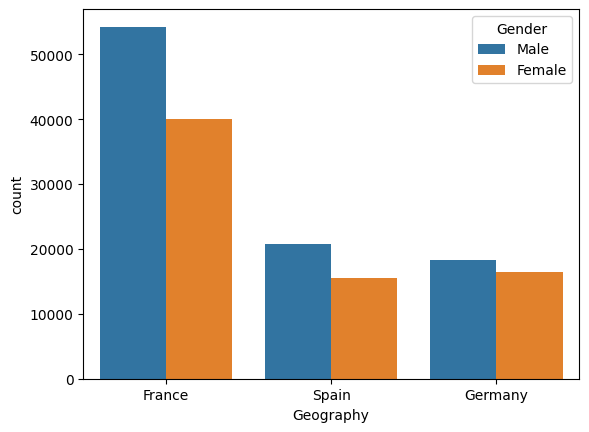

In [14]:
# Count plot of cp column by sex column
sns.countplot(data=df_train, x='Geography',hue='Gender')

## Machine Learning Model


In [15]:
# spliting the data into features and target
X = df_train.drop(['id','CustomerId','Surname', 'Exited'], axis=1)
y = df_train['Exited']

test_ids = df_test['id']
X_test = df_test.drop(columns=['id'])

In [16]:
# encoding the categorical columns using label encoding
le_gender = LabelEncoder()
le_geography = LabelEncoder()

X['Gender'] = le_gender.fit_transform(X['Gender'])
X['Geography'] = le_geography.fit_transform(X['Geography'])

In [17]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Gradient Boosting Classifier Algorithm


In [203]:
# # train the GradientBoostingClassifier model
# gbc = GradientBoostingClassifier(random_state=42, n_estimators=266, max_depth=4)
# model = gbc.fit(X_train, y_train)

# # make predictions
# y_pred = model.predict(X_test)

# # predict probabilities
# y_preds = model.predict_proba(X_test)[:, 1]

# # evaluate the model
# print('Gradient Boosting Classifier')
# print('Accuracy:', accuracy_score(y_test, y_pred))

# # Validation
# roc_auc = roc_auc_score(y_test, y_preds)
# print(f"Validation ROC AUC Score: {roc_auc}")

# # Prediction on test set
# test_preds = model.predict_proba(X_test)[:, 1]

# # label encoding the categorical columns in the test data
# le_gender_test = LabelEncoder()
# le_geography_test = LabelEncoder()

# df_test['Gender'] = le_gender_test.fit_transform(df_test['Gender'])
# df_test['Geography'] = le_geography_test.fit_transform(df_test['Geography'])

# # predict the test data and make the submission file of probability of each class
# test_preds = model.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'],axis=1))
# submission['Exited'] = test_preds[:,1]
# submission.to_csv('submission_02.csv', index=False)
# print("Submission file saved as submission.csv.")

### LightGBM Classifier Algorithm

In [26]:


# Stratified K-Fold Cross-Validation for better generalization
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Updated LightGBM parameters
params = {
    'objective': 'binary',          # Binary classification
    'boosting_type': 'gbdt',        # Gradient Boosting Decision Tree
    'metric': 'auc',                # Evaluation metric
    'learning_rate': 0.05,          # Lower learning rate for better convergence
    'n_estimators': 1000,           # Increase estimators for more iterations
    'max_depth': 6,                 # Slightly deeper trees
    'num_leaves': 31,               # Maximum number of leaves
    'min_data_in_leaf': 20,         # Minimum samples in leaf
    'feature_fraction': 0.8,        # Feature bagging
    'bagging_fraction': 0.8,        # Row bagging
    'bagging_freq': 5,              # Bagging frequency
    'random_state': 42,             # Random seed
    'verbose': -1                   # Suppress verbose output
}

best_auc = 0

# Cross-Validation Loop
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data]
    )
    
    y_val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    auc = roc_auc_score(y_val, y_val_pred)
    best_auc = max(best_auc, auc)

# Final Model on Full Dataset
train_data = lgb.Dataset(X, label=y)
final_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data]
)

# Predictions
y_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluating the model
print('LightGBM Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

# Validation
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Validation ROC AUC Score: {roc_auc}")



LightGBM Classifier
Accuracy: 0.8819947283909474
Validation ROC AUC Score: 0.9160460172394248


In [ ]:
# Encoding the categorical columns in the test data
df_test['Gender'] = le_gender.transform(df_test['Gender'])
df_test['Geography'] = le_geography.transform(df_test['Geography'])

# Making predictions on test dataset for submission
test_data = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_preds = final_model.predict(test_data, num_iteration=final_model.best_iteration)

# Preparing submission file
submission = pd.DataFrame({'id': df_test['id'], 'Exited': test_preds})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv.")

Submission file saved as submission_03.csv.


In [210]:
# Decoding the categorical columns

X['Gender'] = le_gender.inverse_transform(X['Gender'])
X['Geography'] = le_geography.inverse_transform(X['Geography'])

df_test['Gender'] = le_gender_test .fit_transform(df_test['Gender'])
df_test['Geography'] = le_geography_test.fit_transform(df_test['Geography'])